In [395]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import seaborn as sns
from sklearn.metrics import (accuracy_score,
                            classification_report,
                            recall_score, precision_score, f1_score,
                            confusion_matrix)
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import KFold # import KFold
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
# from mlxtend.evaluate import bias_variance_decomp
from sklearn.decomposition import PCA

sns.set_style('darkgrid')
pd. set_option("display.max_columns", None)

import warnings
warnings.filterwarnings('ignore')

In [3]:
#pip install autoviz
#from autoviz.AutoViz_Class import AutoViz_Class

#AV = AutoViz_Class()
%config InlineBackend.figure_format='retina'

In [264]:
%matplotlib inline

In [265]:
#load data from drive
path = "/content/drive/MyDrive/MLP_Dataset1/RTA Dataset.csv"
rts_file = pd.read_csv(path)
rts_file.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,Recreational areas,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [266]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [269]:
#print the row
rts_file.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,Recreational areas,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [270]:
rts_file.sample(5)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
10659,11:45:00,Saturday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,1-2yr,NaN,Office areas,Undivided Two way,Tangent road with mountainous terrain and,NaN,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,1,2,Entering a junction,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Serious Injury
2141,7:50:00,Thursday,18-30,Male,Elementary school,Employee,1-2yr,Lorry (11?40Q),Owner,Unknown,No defect,Industrial areas,Two-way (divided with broken lines road marking),Tangent road with flat terrain,Crossing,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,NaN,Driver or rider,Female,Over 51,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
10434,19:00:00,Tuesday,31-50,Male,Above high school,Employee,2-5yr,Other,Owner,2-5yrs,NaN,Other,Undivided Two way,Tangent road with mountainous terrain and,Y Shape,Asphalt roads,Wet or damp,Darkness - lights lit,Other,Vehicle with vehicle collision,2,3,Going straight,Pedestrian,Male,Under 18,2,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
7793,1:30:00,Sunday,Under 18,Male,Elementary school,Employee,5-10yr,Public (12 seats),Owner,NaN,No defect,Office areas,Double carriageway (median),Tangent road with flat terrain,Crossing,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,4,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
1021,16:56:00,Wednesday,18-30,Unknown,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Going straight,Pedestrian,Male,Under 18,2,Driver,Normal,Crossing from offside - masked by parked or s...,Other,Serious Injury


In [271]:
rts_file.shape

(12316, 32)

In [272]:
rts_file.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [273]:
rts_file.describe(include="all")

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
count,12316,12316,12316,12316,11575,11737,11487,11366,11834,8388,7889,12077,11931,12174,11429,12144,12316,12316,12316,12161,12316.000000,12316.000000,12008,12316,12316,12316,12316,9118,9681,12316,12316,12316
unique,1074,7,5,3,7,4,7,17,4,6,3,14,7,9,8,5,4,4,9,10,NaN,NaN,13,4,3,6,4,7,5,9,20,3
top,15:30:00,Friday,18-30,Male,Junior high school,Employee,5-10yr,Automobile,Owner,Unknown,No defect,Other,Two-way (divided with broken lines road marking),Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,NaN,NaN,Going straight,Driver or rider,Male,na,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
freq,120,2041,4271,11437,7619,9627,3363,3205,10459,2883,7777,3819,4411,10459,4543,11296,9340,8798,10063,8774,NaN,NaN,8158,4944,5253,4443,7076,5903,9608,11390,2263,10415
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.040679,1.548149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.688790,1.007179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [274]:
rts_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [275]:
rts_file.isna().sum() #To get missing values in column

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [276]:
for i in rts_file.columns:
    print(f"unique value in {i} : ")
    print(rts_file[i].unique(), '\n')

unique value in Time : 
['17:02:00' '1:06:00' '14:15:00' ... '7:24:00' '19:18:00' '2:47:00'] 

unique value in Day_of_week : 
['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday'] 

unique value in Age_band_of_driver : 
['18-30' '31-50' 'Under 18' 'Over 51' 'Unknown'] 

unique value in Sex_of_driver : 
['Male' 'Female' 'Unknown'] 

unique value in Educational_level : 
['Above high school' 'Junior high school' nan 'Elementary school'
 'High school' 'Unknown' 'Illiterate' 'Writing & reading'] 

unique value in Vehicle_driver_relation : 
['Employee' 'Unknown' 'Owner' nan 'Other'] 

unique value in Driving_experience : 
['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' nan 'No Licence' 'Below 1yr'
 'unknown'] 

unique value in Type_of_vehicle : 
['Automobile' 'Public (> 45 seats)' 'Lorry (41?100Q)' nan
 'Public (13?45 seats)' 'Lorry (11?40Q)' 'Long lorry' 'Public (12 seats)'
 'Taxi' 'Pick up upto 10Q' 'Stationwagen' 'Ridden horse' 'Other' 'Bajaj'
 'Turbo' 'Motorcycle' 'Special vehi

In [277]:
rts_file.groupby('Accident_severity').size()

Accident_severity
Fatal injury        158
Serious Injury     1743
Slight Injury     10415
dtype: int64

In [278]:
rts_file.groupby('Age_band_of_driver').size()

Age_band_of_driver
18-30       4271
31-50       4087
Over 51     1585
Under 18     825
Unknown     1548
dtype: int64

In [279]:
rts_file.groupby('Day_of_week').size()

Day_of_week
Friday       2041
Monday       1681
Saturday     1666
Sunday       1467
Thursday     1851
Tuesday      1770
Wednesday    1840
dtype: int64

<Figure size 1000x700 with 0 Axes>

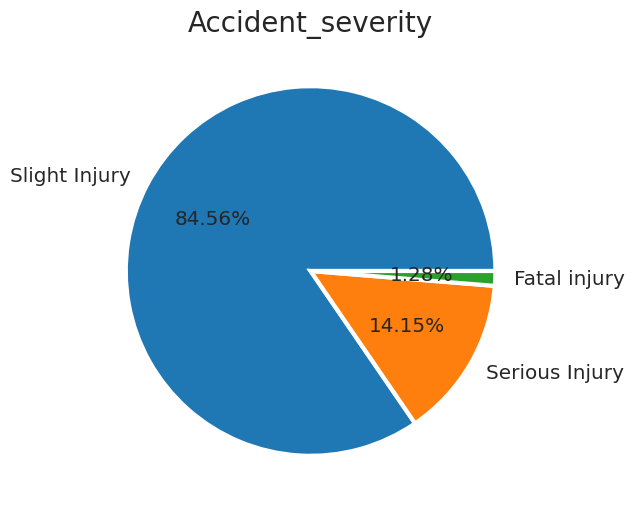

In [280]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))

fig, Ti = plt.subplots(figsize=(6,6))

plt.pie(x=rts_file['Accident_severity'].value_counts().values,
        labels=rts_file['Accident_severity'].value_counts().index,
        autopct='%2.2f%%',
        wedgeprops={'linewidth': 3.0, 'edgecolor': 'w'},
       textprops={'size': 'x-large'})

Ti.set_title('Accident_severity', fontsize=20)
plt.show()


Text(0.5, 1.0, 'To check the distribution of Accident severity')

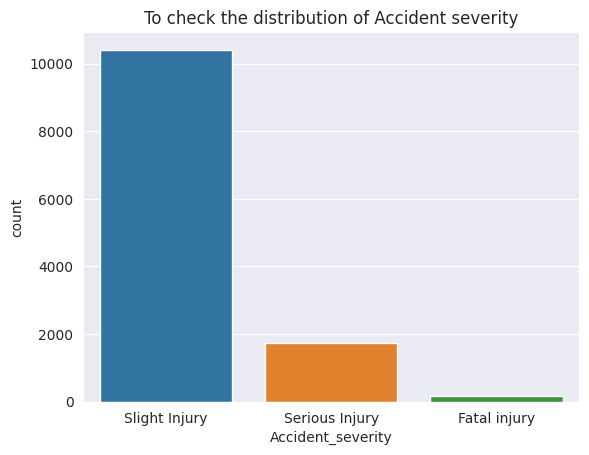

In [281]:
#plotting the final class
sns.countplot(x = rts_file['Accident_severity'])
plt.title('To check the distribution of Accident severity')

<Figure size 1000x700 with 0 Axes>

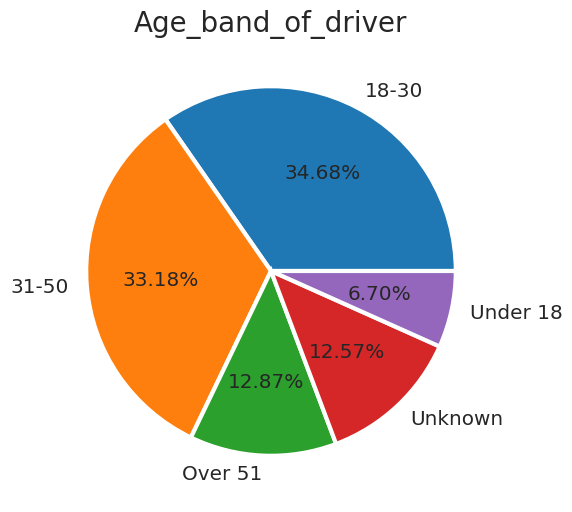

In [282]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))

fig, Ti = plt.subplots(figsize=(6,6))

plt.pie(x=rts_file['Age_band_of_driver'].value_counts().values,
        labels=rts_file['Age_band_of_driver'].value_counts().index,
        autopct='%2.2f%%',
        wedgeprops={'linewidth': 3.0, 'edgecolor': 'w'},
       textprops={'size': 'x-large'})

Ti.set_title('Age_band_of_driver', fontsize=20)
plt.show()

<Figure size 1000x700 with 0 Axes>

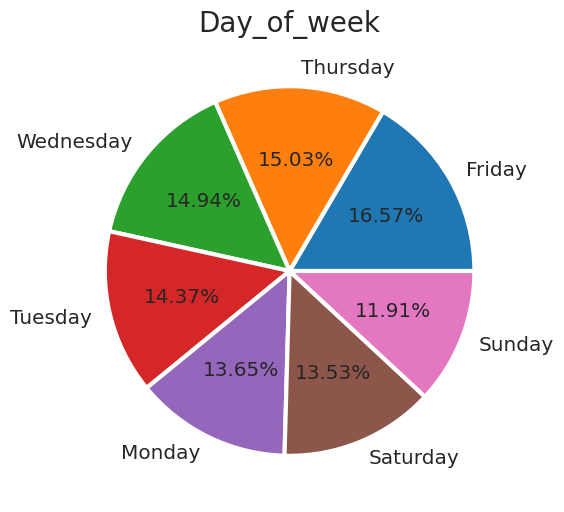

In [283]:
plt.figure(figsize=(10,7))

fig, Ti = plt.subplots(figsize=(6,6))

plt.pie(x=rts_file['Day_of_week'].value_counts().values,
        labels=rts_file['Day_of_week'].value_counts().index,
        autopct='%2.2f%%',
        wedgeprops={'linewidth': 3.0, 'edgecolor': 'w'},
       textprops={'size': 'x-large'})

Ti.set_title('Day_of_week', fontsize=20)
plt.show()

In [284]:
rts_file.groupby('Sex_of_driver').size()

Sex_of_driver
Female       701
Male       11437
Unknown      178
dtype: int64

<Figure size 1000x1000 with 0 Axes>

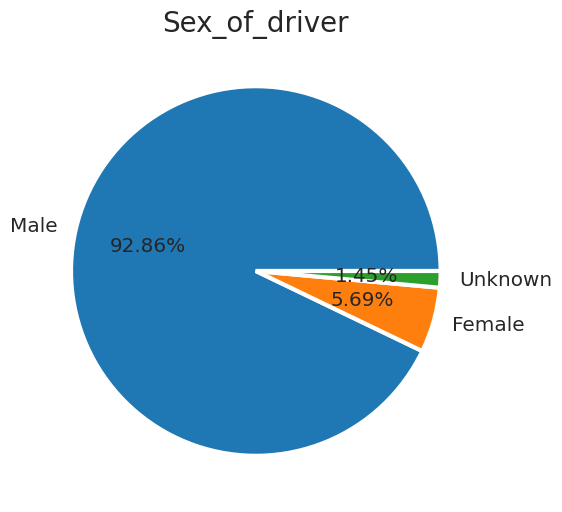

In [285]:
plt.figure(figsize=(10,10))

fig, Ti = plt.subplots(figsize=(6,6))

plt.pie(x=rts_file['Sex_of_driver'].value_counts().values,
        labels=rts_file['Sex_of_driver'].value_counts().index,
        autopct='%2.2f%%',
        wedgeprops={'linewidth': 3.0, 'edgecolor': 'w'},
       textprops={'size': 'x-large'})

Ti.set_title('Sex_of_driver', fontsize=20)
plt.show()

In [286]:
rts_file.groupby('Cause_of_accident').size()

Cause_of_accident
Changing lane to the left               1473
Changing lane to the right              1808
Driving at high speed                    174
Driving carelessly                      1402
Driving to the left                      284
Driving under the influence of drugs     340
Drunk driving                             27
Getting off the vehicle improperly       197
Improper parking                          25
Moving Backward                         1137
No distancing                           2263
No priority to pedestrian                721
No priority to vehicle                  1207
Other                                    456
Overloading                               59
Overspeed                                 61
Overtaking                               430
Overturning                              149
Turnover                                  78
Unknown                                   25
dtype: int64

<Figure size 1000x1000 with 0 Axes>

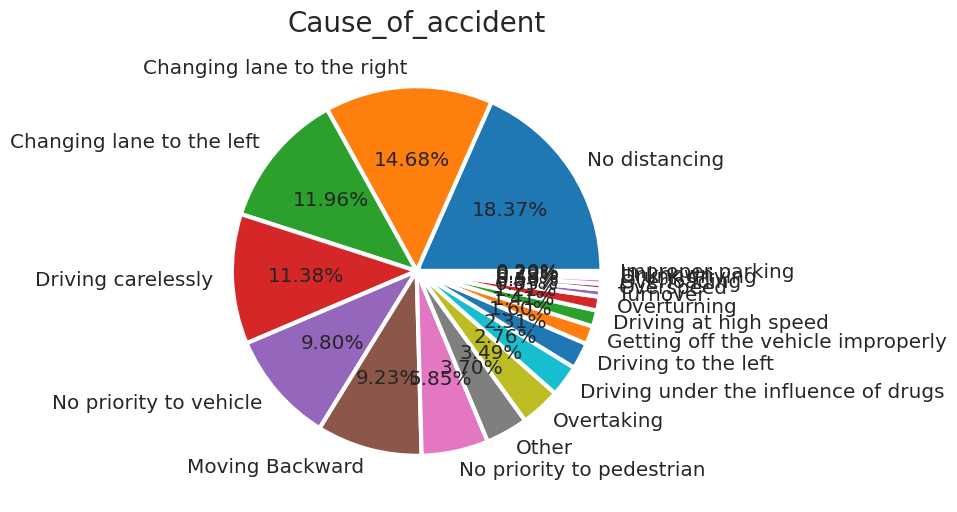

In [287]:
plt.figure(figsize=(10,10))

fig, Ti = plt.subplots(figsize=(6,6))

plt.pie(x=rts_file['Cause_of_accident'].value_counts().values,
        labels=rts_file['Cause_of_accident'].value_counts().index,
        autopct='%2.2f%%',
        wedgeprops={'linewidth': 3.0, 'edgecolor': 'w'},
       textprops={'size': 'x-large'})

Ti.set_title('Cause_of_accident', fontsize=20)
plt.show()

In [288]:
# Handling the missing values
rts_file.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [289]:
# Drop the missing values which can cause imbalance while impiting
rts_file.drop(['Service_year_of_vehicle','Defect_of_vehicle','Work_of_casuality', 'Fitness_of_casuality','Time'], axis = 1, inplace = True)
rts_file.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,na,Not a Pedestrian,Moving Backward,Slight Injury
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Recreational areas,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the left,Serious Injury
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,Female,18-30,3,Not a Pedestrian,Changing lane to the right,Slight Injury
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury


In [290]:
# Store the catrgorical columns to new parameter
categorical=[i for i in rts_file.columns if rts_file[i].dtype=='O']
print('The categorical variables are',categorical)

The categorical variables are ['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions', 'Light_conditions', 'Weather_conditions', 'Type_of_collision', 'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity', 'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity']


In [291]:
#Replace the NULL values
for i in categorical:
    rts_file[i].fillna(rts_file[i].mode()[0],inplace=True)

#Check the present NULL values
rts_file.isna().sum()

Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
dtype: int64

<Axes: >

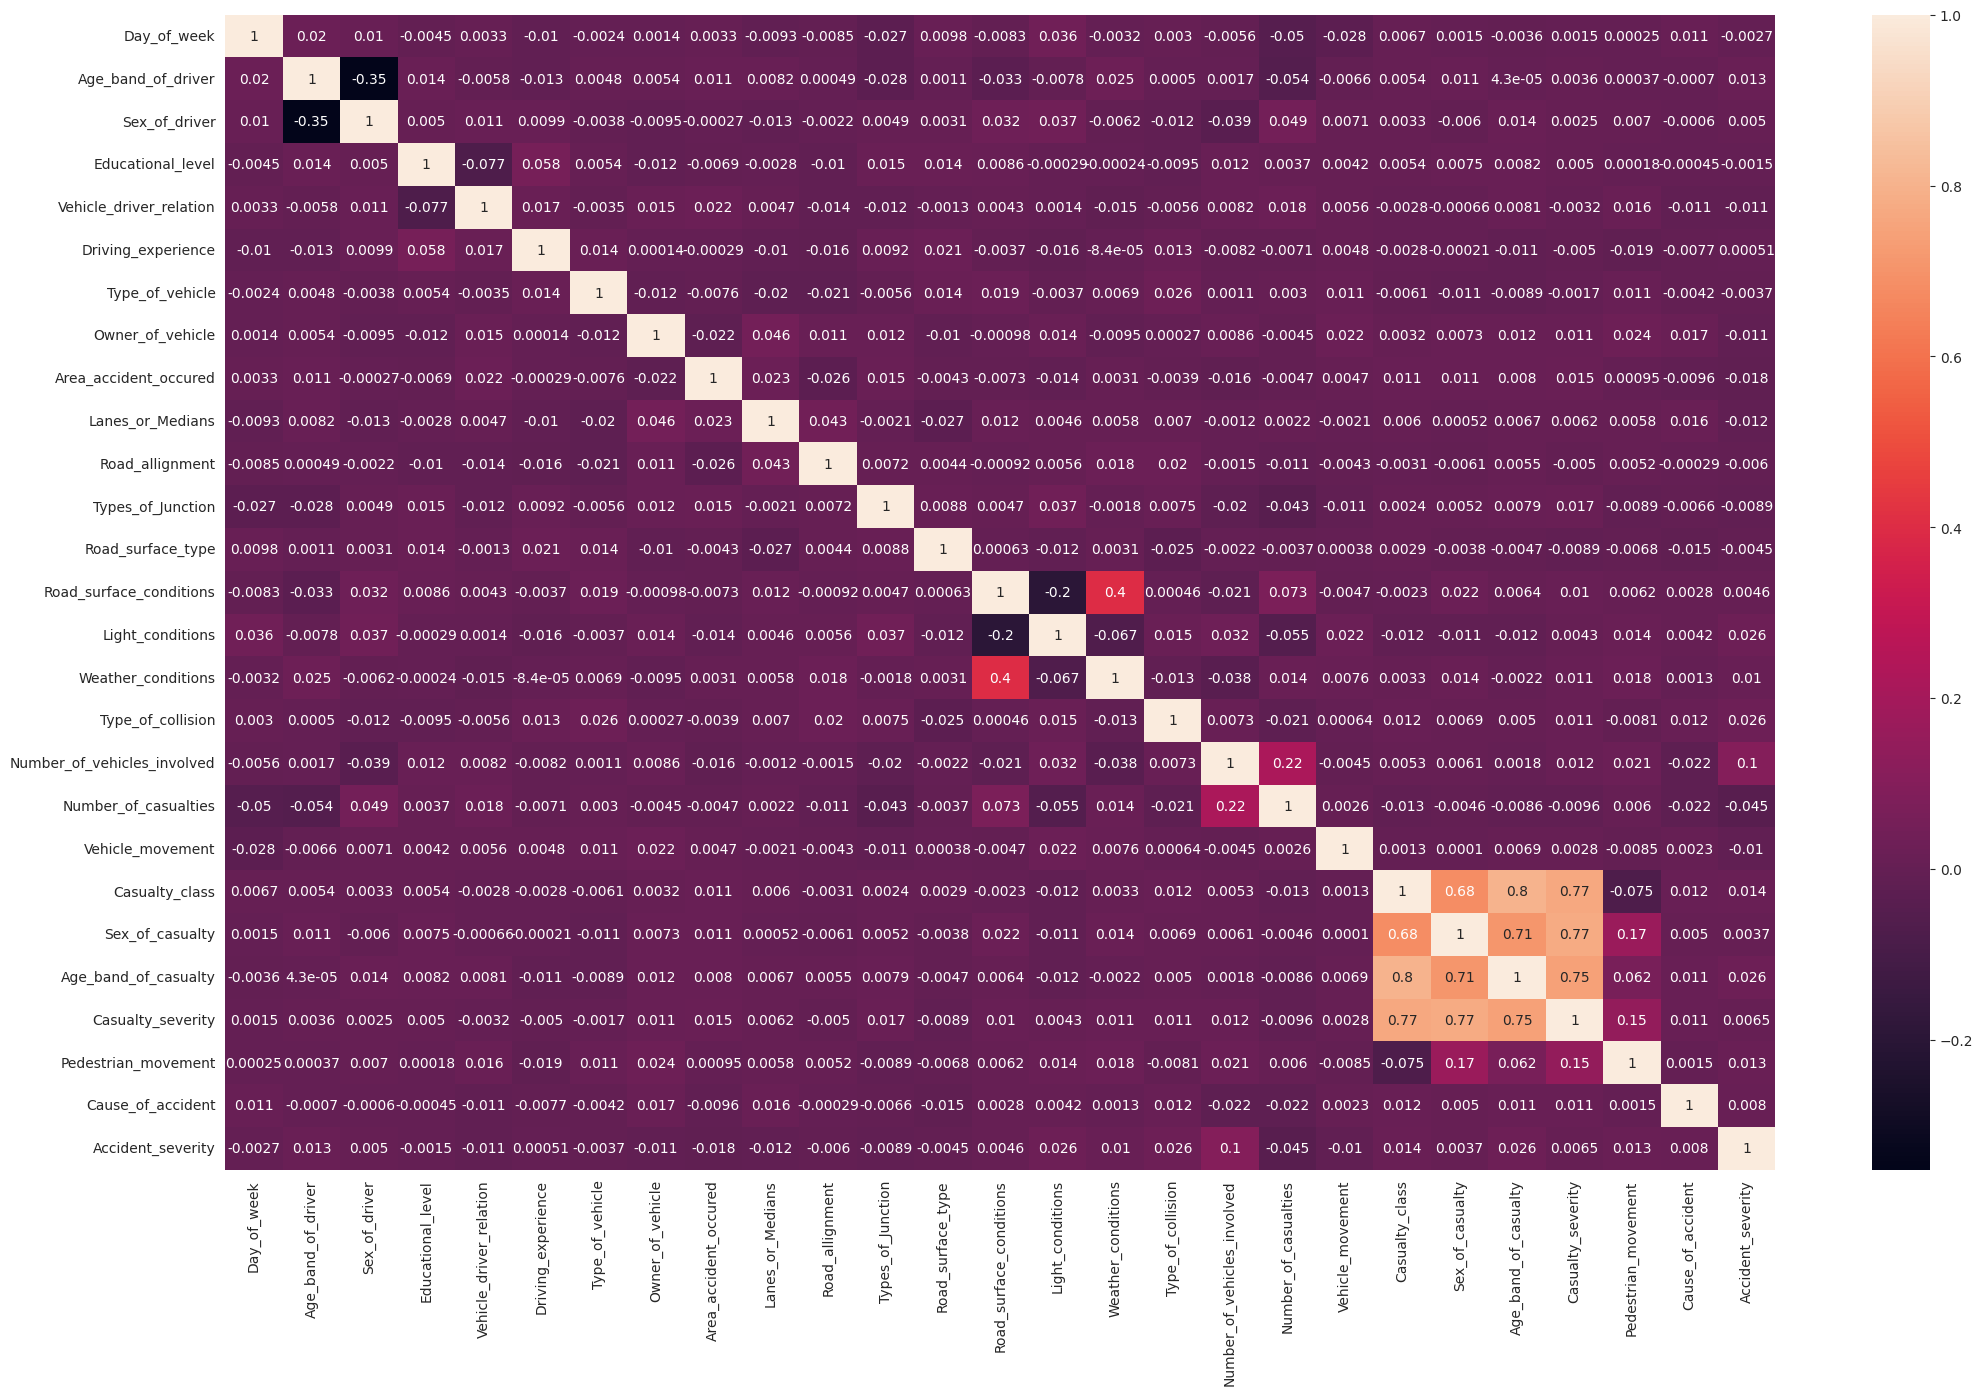

In [350]:
# Encoding -> Converting catrgorical values (data, object) into numbers so that it takes number which can be either of Encdoing (Ranks associated with categories or if data has no rank)
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
rts_file = rts_file.apply(LE.fit_transform) # Calculate values to intergers

plt.figure(figsize=[25,15])
sns.heatmap(rts_file.corr(),annot=True)

In [351]:
for col in rts_file.select_dtypes(include='object'):
    if rts_file[col].nunique() <= 22:
        sns.countplot(y=col, data=rts_file)
        plt.show()

In [352]:
#UPSAMPLING
x = rts_file.drop('Accident_severity', axis=1)
#y = rts_file['Accident_severity']
x.shape
#y.shape

(12316, 26)

In [353]:
x.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident
0,1,0,1,0,0,0,0,3,9,2,5,1,0,0,3,2,3,1,1,2,3,2,5,3,5,9
1,1,1,1,4,0,3,11,3,6,4,5,1,0,0,3,2,8,1,1,2,3,2,5,3,5,16
2,1,0,1,4,0,0,5,3,1,6,5,1,0,0,3,2,2,1,1,2,0,1,1,2,5,0
3,3,0,1,4,0,2,11,0,6,6,6,7,2,0,0,2,8,1,1,2,2,0,0,2,5,1
4,3,0,1,4,0,1,0,3,4,6,5,7,0,0,0,2,8,1,1,2,3,2,5,3,5,16


In [411]:
from sklearn.model_selection import train_test_split

X = rts_file.drop('Accident_severity', axis=1)
y = rts_file['Accident_severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8621, 26) (3695, 26) (8621,) (3695,)


In [412]:
#Upsampling using Smote

from collections import Counter
from imblearn.over_sampling import SMOTE

counter = Counter(y_train)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(y_train)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

counter = Counter(y_train)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(y_train)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

print("=============================")

print("Upsampled data shape: ", X_train.shape, y_train.shape)



Class= 2, n=7324 (84.96%)
Class= 1, n=1191 (13.82%)
Class= 0, n=106 (1.23%)
Class= 2, n=7324 (33.33%)
Class= 1, n=7324 (33.33%)
Class= 0, n=7324 (33.33%)
Upsampled data shape:  (21972, 26) (21972,)


In [427]:
#SPlitting test data and Train data

x = rts_file.drop('Accident_severity', axis=1)
y = rts_file['Accident_severity']
print("Upsampled data shape: ", X_train.shape, y_train.shape)

Upsampled data shape:  (21972, 26) (21972,)


In [415]:
#Modelling

models={"LogisticRegression":LogisticRegression(),
        "DecisionTreeClassifier":DecisionTreeClassifier(),
        "SVM":SVC(),
        "KNeighborsClassifier":KNeighborsClassifier(),
        "GNB":GaussianNB(),
       "RandomForestClassifier":RandomForestClassifier(),
        "AdaBoostClassifier":AdaBoostClassifier(),
        "GradientBoostingClassifier":GradientBoostingClassifier(),
        }

In [416]:
# models,x,y,scaleFlag=0,1,2
def modelAccuracy(models,x,y,scaleFlag):
    #train/Test
    X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
    acc_result={}
    for name,model in models.items():
        #pipeline
        #1.Transformer -> 2.Model
        if(scaleFlag==1):
            model_pipeline=Pipeline([('MinMaxScler',MinMaxScaler()),('model',model)])
        elif(scaleFlag==2):
             model_pipeline=Pipeline([('StandardScaler',StandardScaler()),('model',model)])
        else:
            model_pipeline=Pipeline([('model',model)])
        #training/testing on model pipeline
        model_fit=model_pipeline.fit(X_train,y_train)
        ypred=model_fit.predict(X_test)
        acc=accuracy_score(y_test,ypred)
        print("The Accuracy for ",name," is :",acc)
        acc_result[name]=acc
    return acc_result

In [428]:
def bestModel(result):
    high=0
    for name,acc in result.items():
        if acc>high:
            high=acc
            model_name=name
    print("Best Model is ",model_name," with accuaracy =>",high)

In [429]:
def bestParams(model,param,X_train,y_train):
    #cv
    cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=3)
    grid_cv=GridSearchCV(estimator=model,param_grid=param,cv=cv,scoring="f1_weighted")
    res=grid_cv.fit(X_train,y_train)
    print("Best Parameters are ",res.best_params_)
    print("Best Accuracy is ",res.best_score_)

In [430]:
bestParams

<function __main__.bestParams(model, param, X_train, y_train)>

In [420]:
acc=modelAccuracy(models,x,y,1)

The Accuracy for  LogisticRegression  is : 0.84375
The Accuracy for  DecisionTreeClassifier  is : 0.7520292207792207
The Accuracy for  SVM  is : 0.84375
The Accuracy for  KNeighborsClassifier  is : 0.825487012987013
The Accuracy for  GNB  is : 0.8080357142857143
The Accuracy for  RandomForestClassifier  is : 0.8478084415584416
The Accuracy for  AdaBoostClassifier  is : 0.8425324675324676
The Accuracy for  GradientBoostingClassifier  is : 0.846185064935065


In [432]:
bestModel(acc)
print("Upsampled data shape: ", X_train.shape, y_train.shape)

Best Model is  RandomForestClassifier  with accuaracy => 0.8478084415584416
Upsampled data shape:  (21972, 26) (21972,)


In [433]:
model=RandomForestClassifier()
params={"n_estimators" : [100,200],
        "criterion" : ["gini","entropy"]
        }
bestParams(model,params,X_train,y_train)

Best Parameters are  {'criterion': 'entropy', 'n_estimators': 200}
Best Accuracy is  0.931117270127367


In [434]:
#retrain the model with best parameters
model=RandomForestClassifier(criterion="entropy",n_estimators=200)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

0.7956698240866035
              precision    recall  f1-score   support

           0       0.07      0.02      0.03        52
           1       0.28      0.18      0.22       552
           2       0.85      0.92      0.88      3091

    accuracy                           0.80      3695
   macro avg       0.40      0.37      0.38      3695
weighted avg       0.76      0.80      0.77      3695



<Axes: >

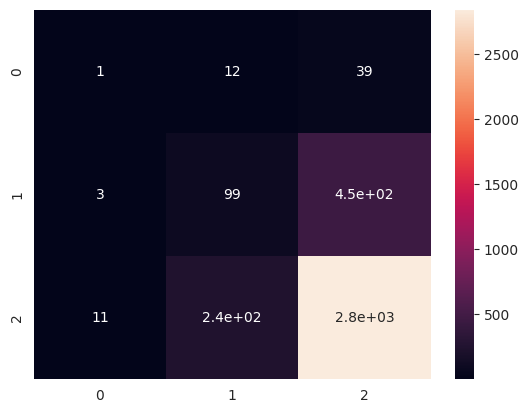

In [436]:
#Final Evaluation
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)